# WeatherPy
----

#### Note

* Creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. 
* Utilizing a simple Python library, the OpenWeatherMap API, and creating a representative model of weather across world cities.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from matplotlib.dates import DateFormatter

#import openweathermapy as owm
from datetime import datetime

# Import API key
from api_keys import api_key


# Import API key
import api_keys


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['narsaq',
 'chengde',
 'chuy',
 'tiksi',
 'ruatoria',
 'mataura',
 'codrington',
 'brora',
 'araceli',
 'rikitea',
 'castro',
 'te%20anau',
 'bethel',
 'faanui',
 'presidencia%20roque%20saenz%20pena',
 'batagay-alyta',
 'mau',
 'barrow',
 'grand%20river%20south%20east',
 'bida',
 'verkhnyaya%20inta',
 'koshurnikovo',
 'provideniya',
 'saryozek',
 'sola',
 'cayenne',
 'dubti',
 'gumdag',
 'arraial%20do%20cabo',
 'cabo%20san%20lucas',
 'hobart',
 'ilulissat',
 'lewiston',
 'dikson',
 'hilo',
 'hasaki',
 'portland',
 'jamestown',
 'lasem',
 'belushya%20guba',
 'burnie',
 'taolanaro',
 'ushuaia',
 'saldanha',
 'la%20baule-escoublac',
 'kahului',
 'vaini',
 'vestmannaeyjar',
 'carnarvon',
 'abnub',
 'hermanus',
 'amderma',
 'port%20alfred',
 'maceio',
 'georgetown',
 'mandal',
 'vysotsk',
 'krasnyy%20yar',
 'east%20london',
 'attawapiskat',
 'esmeraldas',
 'yellowknife',
 'roald',
 'vaitupu',
 'longyearbyen',
 'snezhnogorsk',
 'busselton',
 'saleaula',
 'mount%20isa',
 'cape%20town',
 'atu

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# counter for counting the number of API calls
record_count = 1

# counter for counting the number of sets
sets_count = 1

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Set a start time for API calls
t0 =time.time()

print(f"Beginning Data Retrieval\n ........................")

for city in cities:  
    
    try:
        response = requests.get(f"{url}&q={city}").json() 
        
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        # Return the city name without "20% in lowercase"
        city_record = response["name"].lower()
        print(f"Processing Record {record_count} of Set {sets_count} | {city_record}")
        
        #Perform a weather check on each city using a series of successive API calls
        f"{url}&q={city}"
               
                
    # Skip if no match found
    except:
        print("City not found. Skipping...")
    
    record_count += 1
    
    # loop to limit 50 API calls per minute, since OpenWeatherMap API rate limit is 60 calls/min
    if record_count == 51:
        
        # Check the time
        t1=time.time()
        
        record_count = 1
        
        sets_count += 1
        
        # Calculate the wait time, before requesting the next 50 API calls
        time.sleep(60-(t1-t0))
        t0=time.time()
        
        
print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")   

Beginning Data Retrieval
 ........................
Processing Record 1 of Set 1 | narsaq
Processing Record 2 of Set 1 | chengde
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | tiksi
City not found. Skipping...
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | brora
Processing Record 9 of Set 1 | araceli
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | te anau
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | presidencia roque saenz pena
Processing Record 16 of Set 1 | batagay-alyta
Processing Record 17 of Set 1 | mau
Processing Record 18 of Set 1 | barrow
City not found. Skipping...
Processing Record 20 of Set 1 | bida
Processing Record 21 of Set 1 | verkhnyaya inta
Processing Record 22 of Set 1 | koshurnikovo
Processing Record 23 of Set 1 | provideniya
Processing Record 24 of Set 1 | s

Processing Record 9 of Set 5 | takoradi
Processing Record 10 of Set 5 | carutapera
Processing Record 11 of Set 5 | belmonte
Processing Record 12 of Set 5 | upernavik
Processing Record 13 of Set 5 | anastasiyevskaya
Processing Record 14 of Set 5 | bubaque
Processing Record 15 of Set 5 | san patricio
Processing Record 16 of Set 5 | komsomolskiy
Processing Record 17 of Set 5 | hervey bay
Processing Record 18 of Set 5 | pisco
Processing Record 19 of Set 5 | chokurdakh
Processing Record 20 of Set 5 | zakupne
Processing Record 21 of Set 5 | kharitonovo
Processing Record 22 of Set 5 | kochki
Processing Record 23 of Set 5 | lebu
Processing Record 24 of Set 5 | kizukuri
Processing Record 25 of Set 5 | salalah
Processing Record 26 of Set 5 | hualmay
Processing Record 27 of Set 5 | haines junction
Processing Record 28 of Set 5 | kasongo
Processing Record 29 of Set 5 | ereymentau
Processing Record 30 of Set 5 | turayf
Processing Record 31 of Set 5 | kozhevnikovo
Processing Record 32 of Set 5 | mar

Processing Record 14 of Set 9 | namatanai
Processing Record 15 of Set 9 | yulara
Processing Record 16 of Set 9 | constitucion
Processing Record 17 of Set 9 | romanovskaya
City not found. Skipping...
Processing Record 19 of Set 9 | pozo colorado
Processing Record 20 of Set 9 | naze
City not found. Skipping...
Processing Record 22 of Set 9 | lazaro cardenas
Processing Record 23 of Set 9 | nieuw amsterdam
Processing Record 24 of Set 9 | mokhsogollokh
Processing Record 25 of Set 9 | iqaluit
Processing Record 26 of Set 9 | kremnica
Processing Record 27 of Set 9 | moba
Processing Record 28 of Set 9 | rocha
City not found. Skipping...
Processing Record 30 of Set 9 | honiara
Processing Record 31 of Set 9 | derzhavinsk
Processing Record 32 of Set 9 | qasigiannguit
Processing Record 33 of Set 9 | pangoa
Processing Record 34 of Set 9 | manpur
Processing Record 35 of Set 9 | pesca
Processing Record 36 of Set 9 | bang mun nak
Processing Record 37 of Set 9 | barinas
Processing Record 38 of Set 9 | v

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictionary
city_data_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a dataframe 
city_data_df = pd.DataFrame(city_data_dict)

# Save/Export to csv file
city_data_df.to_csv("city_data.csv", encoding='utf-8', index=False)


In [6]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Narsaq,20,GL,1562256655,47,60.91,-46.05,59.00,6.93
1,ChengDe,84,CN,1562256655,68,40.97,117.93,68.70,3.40
2,Chuy,14,UY,1562256655,63,-33.69,-53.46,48.18,18.16
3,Tiksi,100,RU,1562256655,92,71.64,128.87,35.58,5.23
4,Mataura,45,NZ,1562256655,95,-46.19,168.86,39.99,1.99


In [7]:
dateTimeObj = datetime.now()
datestamp = dateTimeObj.strftime("%m/%d/%y")
datestamp 

'07/04/19'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

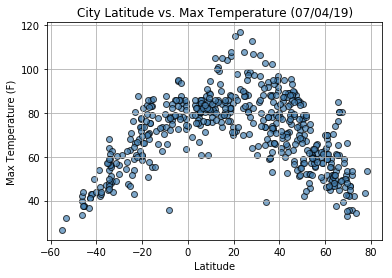

In [15]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color='steelblue', edgecolors="black", alpha=0.7)
plt.title(f'City Latitude vs. Max Temperature ({datestamp})')

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("MaxTemp_vs_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

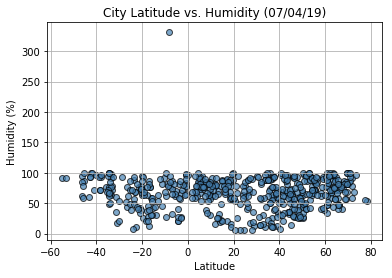

In [13]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color='steelblue', edgecolors="black", alpha=0.7)
plt.title(f'City Latitude vs. Humidity ({datestamp})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

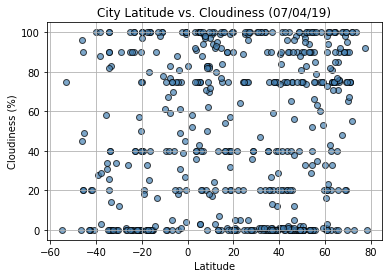

In [16]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],marker="o",color='steelblue', edgecolors="black", alpha=0.7)
plt.title(f'City Latitude vs. Cloudiness ({datestamp})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

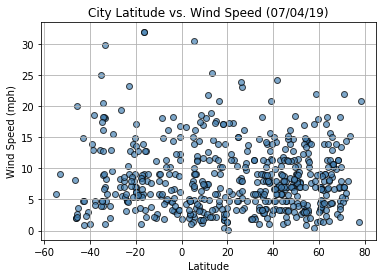

In [17]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color='steelblue', edgecolors="black", alpha=0.7)
plt.title(f'City Latitude vs. Wind Speed ({datestamp})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Lat_Vs_WindSpeed.png")
plt.show()

## Analysis (observable trends based on the data)
_______________________________________________

•	Observation from the latitude vs max. temperature  scatter plot shows that the weather for cities closer to the equator are significantly warmer. The closer one is to the equator, the warmer the temperature. 


•	Observation from the latitude vs cloudiness scatter plot shows no strong correlation between latitude and cloudiness, however there are some strong band of cities at 0, 20, 40, about 80, 90 and 100% cloudiness.


•	Observation from the latitude vs wind speed scatter plot shows no strong correlation between latitude and wind speed. Most cities are within 0 to 20mph wind speed while some few cities are above 20mph.

•	Observation from the latitude vs humidity scatter plot shows that most cities are within 30 - 100% except for Pucallpa city that is above 300% humid, that is interesting to observe!




